## Objetivo De esta DataFrame
- Objetivo: Entender el rendimiento académico de los estudiantes, identificar factores que influyen en sus calificaciones, o segmentar a los estudiantes en grupos según su rendimiento.

#### Las posibles preguntas claves puedes ser las siguientes.

- ¿Cuáles son los factores principales que afectan el rendimiento académico?
- ¿Existen grupos de estudiantes con características similares?
- ¿Cómo varía el rendimiento según variables como la edad, género, o asistencia?
- Stakeholders: Puede ser la dirección académica, profesores, o un equipo de investigación que busca mejorar el rendimiento estudiantil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/jhonfypy/NpyPandaNuevos/NpyPandaAnalisisFYNEKA/data/Estudiantes.csv'
estudiante_data = pd.read_csv(path, delimiter=';')
print(type(path))
print(estudiante_data)

<class 'str'>
      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                

## Estructuras de Datos en Pandas y Funciones
#### Explorando algunas funciones de resumen y estadísticas que podemos utilizar con nuestro DataFrame.

In [11]:
# Voy a generalizar mi dataset tecnicamente 
df = estudiante_data

df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


- valores nulos en el dataset
- duplicados
- valores únicos en la columna 'Target' para asegurar que solo haya dos categorías (Graduado, Abandonado)

In [12]:
null_values = df.isnull().sum()

duplicated_rows = df.duplicated().sum()

target_values = df['Target'].unique()

null_values, duplicated_rows, target_values


(Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance\t                      0
 Previous qualification                            0
 Previous qualification (grade)                    0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Admission grade                                   0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                           

- Información general del dataset para verificar que la estructura sea correcta

In [13]:
df_head = df.head()
df_info = df.info()

df_head, df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

(   Marital status  Application mode  Application order  Course  \
 0               1                17                  5     171   
 1               1                15                  1    9254   
 2               1                 1                  5    9070   
 3               1                17                  2    9773   
 4               2                39                  1    8014   
 
    Daytime/evening attendance\t  Previous qualification  \
 0                             1                       1   
 1                             1                       1   
 2                             1                       1   
 3                             1                       1   
 4                             0                       1   
 
    Previous qualification (grade)  Nacionality  Mother's qualification  \
 0                           122.0            1                      19   
 1                           160.0            1                       1   
 2       

In [14]:
# Numero de columnas 
columns_name = df.columns
print(columns_name)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [16]:
# Numero defilas 
num_rows, num_colums = df.shape
print('Numero de filas', num_rows)
print('Numero de columnas', num_colums)

Numero de filas 4424
Numero de columnas 37


In [22]:
# accediendo a cada columna estadisticamente que seria las series 
daily_sales = df['Marital status']
print(daily_sales)

0       1
1       1
2       1
3       1
4       2
       ..
4419    1
4420    1
4421    1
4422    1
4423    1
Name: Marital status, Length: 4424, dtype: int64


In [24]:
# realizando una descripcion estadistica de las columnas utilizando la media o estandar 
summary = df.describe()
print(summary)


       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [25]:
# Valor por cada columna 
print('\nLa media ')
mean_value = daily_sales.mean()
print('La media es ===> ', mean_value)

print('\nLa mediana ')
median_value = daily_sales.median()
print('La mediana es ===> ', median_value)

print('\nEl minimo ')
min_value = daily_sales.min()
print('El minimo es ===> ', min_value)

print('\nLa suma total ')
sum_total = daily_sales.sum()
print('La suma total es  ===> ', sum_total)


La media 
La media es ===>  1.1785714285714286

La mediana 
La mediana es ===>  1.0

El minimo 
El minimo es ===>  1

La suma total 
La suma total es  ===>  5214


In [26]:
Description = df.sort_values(by='Course', ascending=False)
print(Description)

      Marital status  Application mode  Application order  Course  \
4393               1                39                  1    9991   
4387               2                 1                  1    9991   
4379               1                39                  1    9991   
4377               2                43                  1    9991   
4375               1                43                  1    9991   
...              ...               ...                ...     ...   
2256               1                 7                  1      33   
693                1                39                  1      33   
3713               1                43                  1      33   
1560               1                15                  1      33   
4413               1                43                  1      33   

      Daytime/evening attendance\t  Previous qualification  \
4393                             0                       1   
4387                             0             

In [28]:
# Resumen estadístico
summary = df.describe()
print("Resumen estadístico:\\n", summary)

Resumen estadístico:\n        Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000              

# Uso de iloc y loc en Pandas

##### Seleccionar datos es una operación fundamental en cualquier análisis de datos. En Pandas, las dos formas más comunes de seleccionar datos son **iloc y loc.**

**iloc[]**
- Indexación por Enteros
**iloc** 
- se utiliza para la indexación basada en enteros, permitiendo seleccionar filas y columnas por su posición.

In [30]:
first_rows = df.iloc[2]
print(first_rows)

Marital status                                          1
Application mode                                        1
Application order                                       5
Course                                               9070
Daytime/evening attendance\t                            1
Previous qualification                                  1
Previous qualification (grade)                      122.0
Nacionality                                             1
Mother's qualification                                 37
Father's qualification                                 37
Mother's occupation                                     9
Father's occupation                                     9
Admission grade                                     124.8
Displaced                                               1
Educational special needs                               0
Debtor                                                  0
Tuition fees up to date                                 0
Gender        

In [35]:
# # Imprimiendo las primeras 20 filas 
first_five_rows = df.iloc[:20]
first_five_rows.head(37)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


- Uso de iloc para seleccionar filas y columnas por índice
- Seleccionar las primeras 5 filas y las primeras 3 columnas

In [37]:
subset_iloc = estudiante_data.iloc[:20, :10]
print("Subset utilizando iloc:")
#print(subset_iloc)
subset_iloc.head(20)

Subset utilizando iloc:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification
0,1,17,5,171,1,1,122.0,1,19,12
1,1,15,1,9254,1,1,160.0,1,1,3
2,1,1,5,9070,1,1,122.0,1,37,37
3,1,17,2,9773,1,1,122.0,1,38,37
4,2,39,1,8014,0,1,100.0,1,37,38
5,2,39,1,9991,0,19,133.1,1,37,37
6,1,1,1,9500,1,1,142.0,1,19,38
7,1,18,4,9254,1,1,119.0,1,37,37
8,1,1,3,9238,1,1,137.0,62,1,1
9,1,1,1,9238,1,1,138.0,1,1,19


In [39]:
# Creando un subset de las columnas 
subset = df.iloc[:10, :6]
#print(subset)
subset.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification
0,1,17,5,171,1,1
1,1,15,1,9254,1,1
2,1,1,5,9070,1,1
3,1,17,2,9773,1,1
4,2,39,1,8014,0,1
5,2,39,1,9991,0,19
6,1,1,1,9500,1,1
7,1,18,4,9254,1,1
8,1,1,3,9238,1,1
9,1,1,1,9238,1,1


## Trabajando con loc 


- Uso de loc para seleccionar filas y columnas por etiquetas


In [40]:
row_index_3 = df.loc[3]
print(row_index_3)

Marital status                                            1
Application mode                                         17
Application order                                         2
Course                                                 9773
Daytime/evening attendance\t                              1
Previous qualification                                    1
Previous qualification (grade)                        122.0
Nacionality                                               1
Mother's qualification                                   38
Father's qualification                                   37
Mother's occupation                                       5
Father's occupation                                       3
Admission grade                                       119.6
Displaced                                                 1
Educational special needs                                 0
Debtor                                                    0
Tuition fees up to date                 

In [41]:
# Indices de columnas 
row_index_0_to_8 = df.loc[0:8]
print(row_index_0_to_8)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0             

In [42]:
#Especificando la etiquetade la columna que queremos
# Este caso queremos ver 'Mothers qualification' 
Quantity_column = df.loc[:'Mothers qualification']
print(Quantity_column)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [44]:
#imprimiendo los datos de varias columnas 
quantity_unipreces_column = df.loc[:,['Marital status', 'Application mode', 'Application order', 'Course']]
print(quantity_unipreces_column)

      Marital status  Application mode  Application order  Course
0                  1                17                  5     171
1                  1                15                  1    9254
2                  1                 1                  5    9070
3                  1                17                  2    9773
4                  2                39                  1    8014
...              ...               ...                ...     ...
4419               1                 1                  6    9773
4420               1                 1                  2    9773
4421               1                 1                  1    9500
4422               1                 1                  1    9147
4423               1                10                  1    9773

[4424 rows x 4 columns]


In [46]:
subset_loc = df.loc[df['Gender'] == 1, ['Course', 'Admission grade']]
print("\nSubset utilizando loc:")
print(subset_loc)


Subset utilizando loc:
      Course  Admission grade
0        171            127.3
1       9254            142.5
2       9070            124.8
5       9991            114.8
7       9254            113.1
...      ...              ...
4411    9130            150.0
4412    9070            133.4
4413      33            121.2
4418    9070            120.0
4419    9773            122.2

[1556 rows x 2 columns]


- Uso avanzado de loc para modificar datos
- Cambiar el valor de 'Tuition fees up to date' a 0 para los estudiantes que tienen 'Debtor' igual a 1


In [47]:
estudiante_data.loc[estudiante_data['Debtor'] == 1, 'Tuition fees up to date'] = 0

# cambios
print("\nDatos modificados con loc:")
print(estudiante_data.loc[estudiante_data['Debtor'] == 1, ['Debtor', 'Tuition fees up to date']])


Datos modificados con loc:
      Debtor  Tuition fees up to date
5          1                        0
9          1                        0
25         1                        0
35         1                        0
39         1                        0
...      ...                      ...
4395       1                        0
4400       1                        0
4404       1                        0
4415       1                        0
4420       1                        0

[503 rows x 2 columns]


# Manejo de Datos Faltantes en Pandas

Manejar datos faltantes es un paso crucial en el proceso de limpieza y preparación de datos para el análisis. Pandas ofrece una variedad de métodos para identificar, eliminar, y rellenar datos faltantes en un DataFrame o Series

- Manejar datos faltantes es un paso crucial en el proceso de limpieza y preparación de datos para el análisis. Pandas ofrece una variedad de métodos para identificar, eliminar, y rellenar datos faltantes en un DataFrame o Series.

### Identificación de Datos Faltantes
Primero, es importante identificar dónde se encuentran los datos faltantes en tu dataset.

### Métodos Comunes:
"isnull()": Devuelve un DataFrame del mismo tamaño que indica con True o False dónde hay valores faltantes (NaN).
"notnull": Es lo contrario de isnull(), devuelve True donde no hay valores faltantes.

In [48]:
missing_data = estudiante_data.isna()
missing_data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
missing_data_count = estudiante_data.isna().sum()
print('Conteo de datos faltantes por colomna:\n', missing_data_count)

Conteo de datos faltantes por colomna:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder      

In [9]:
#Eleminando valores faltantes 
no_missing_rows = estudiante_data.dropna()
print('Datos sin fila con valores faltantes:\n', no_missing_rows)

Datos sin fila con valores faltantes:
       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1       

In [49]:
#Datos sin columnas con valor faltantes
no_missing_rows = df.dropna(axis=1)
print(no_missing_rows)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

## Estructuras de Datos en Pandas y Funciones
#### Resumen y estadísticas que podemos utilizar con nuestro DataFrame.

In [50]:
# LLenando los valores faltantes con zero 
retail_data_fillef_zeros = df.fillna(0)
print(retail_data_fillef_zeros)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [59]:
# Remplazando valores faltates con la media 
mean_unit_price = df['Course'].mean()
retail_data_filled_mean =df['Course'].fillna(mean_unit_price)
print(retail_data_filled_mean)

0        171
1       9254
2       9070
3       9773
4       8014
        ... 
4419    9773
4420    9773
4421    9500
4422    9147
4423    9773
Name: Course, Length: 4424, dtype: int64


## Conclusión
- El manejo de datos faltantes es un aspecto crucial del preprocesamiento de datos en análisis de datos. La elección entre eliminar o imputar datos faltantes depende de la naturaleza de los datos y del impacto que los datos faltantes pueden tener en el análisis. Con las herramientas que ofrece Pandas, puedes manejar eficientemente los datos faltantes de manera flexible y adecuada.

# Creación y Manipulación de Columnas en Pandas

In [61]:
df = df 
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [68]:
# Creando una nueva columna con el promedio de las notas de los dos semestres
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

(df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Average Grade']].head())


,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Average Grade
0,0.000000,0.000000,0.000000
1,14.000000,13.666667,13.833333
2,0.000000,0.000000,0.000000
3,13.428571,12.400000,12.914286
4,12.333333,13.000000,12.666667


In [70]:
# Clasificar a los estudiantes en categorías según su nota de admisión
df['Admission Category'] = pd.cut(df['Admission grade'], bins=[0, 10, 14, 20], labels=['Bajo', 'Medio', 'Alto'])

print(df[['Admission grade', 'Admission Category']].head())


   Admission grade Admission Category
0            127.3                NaN
1            142.5                NaN
2            124.8                NaN
3            119.6                NaN
4            141.5                NaN


In [73]:
# Convertir la edad de inscripción de años a meses
df['Age at enrollment (months)'] = df['Age at enrollment'] * 12

(df[['Age at enrollment', 'Age at enrollment (months)']].head(10))


,Age at enrollment,Age at enrollment (months)
0,20,240
1,19,228
2,19,228
3,20,240
4,45,540
5,50,600
6,18,216
7,22,264
8,21,252
9,18,216


In [76]:
#calificación más alta entre los dos semestres
df['Highest Grade'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].max(axis=1)

(df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Highest Grade']].head(20))


,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Highest Grade
0,0.000000,0.000000,0.000000
1,14.000000,13.666667,14.000000
2,0.000000,0.000000,0.000000
3,13.428571,12.400000,13.428571
4,12.333333,13.000000,13.000000
5,11.857143,11.500000,11.857143
6,13.300000,14.345000,14.345000
7,0.000000,0.000000,0.000000
8,13.875000,14.142857,14.142857
9,11.400000,13.500000,13.500000


## Lista con las columnas de las calificaciones de las materias

In [78]:
grade_columns = [
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)'
]

df['Highest Grade'] = df[grade_columns].max(axis=1)

df['Highest Grade Subject'] = df[grade_columns].idxmax(axis=1)

print(df[['Highest Grade', 'Highest Grade Subject']].head(20))


    Highest Grade             Highest Grade Subject
0        0.000000  Curricular units 1st sem (grade)
1       14.000000  Curricular units 1st sem (grade)
2        0.000000  Curricular units 1st sem (grade)
3       13.428571  Curricular units 1st sem (grade)
4       13.000000  Curricular units 2nd sem (grade)
5       11.857143  Curricular units 1st sem (grade)
6       14.345000  Curricular units 2nd sem (grade)
7        0.000000  Curricular units 1st sem (grade)
8       14.142857  Curricular units 2nd sem (grade)
9       13.500000  Curricular units 2nd sem (grade)
10      14.200000  Curricular units 2nd sem (grade)
11      13.214286  Curricular units 1st sem (grade)
12       0.000000  Curricular units 1st sem (grade)
13      11.000000  Curricular units 2nd sem (grade)
14      13.250000  Curricular units 1st sem (grade)
15      13.200000  Curricular units 1st sem (grade)
16      12.000000  Curricular units 1st sem (grade)
17      14.545000  Curricular units 2nd sem (grade)
18      12.5

- .max(axis=1): Calcula el valor máximo entre las dos columnas para cada fila (axis=1 indica que la operación se aplica a lo largo de las filas).

In [89]:
print(df.info(37))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   object  
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   object  
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

In [83]:
df['Marital status'] = df['Marital status'].astype(str)
df['Course'] = df['Course'].astype(str)

df['MaritalCourse'] = df['Marital status'] + ' - ' + df['Course']

(df[['Marital status', 'Course', 'MaritalCourse']].head())


,Marital status,Course,MaritalCourse
0,1,171,1 - 171
1,1,9254,1 - 9254
2,1,9070,1 - 9070
3,1,9773,1 - 9773
4,2,8014,2 - 8014


# Agrupaciones con groupby


- El uso de groupby en Pandas es fundamental para realizar análisis de datos agregados. Esta función permite agrupar datos en función de una o más columnas y luego aplicar operaciones de agregación, como suma, media, conteo, entre otras.

In [90]:
#Contando todos los valores de nuestro dataset 
country_count = df['Target'].value_counts()
print(country_count)

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [91]:
# Contar el número de estudiantes por estado civil
marital_counts = df.groupby('Marital status').size()
print(marital_counts)


Marital status
1    3919
2     379
3       4
4      91
5      25
6       6
dtype: int64


/tmp/ipykernel_42666/537187449.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='viridis')


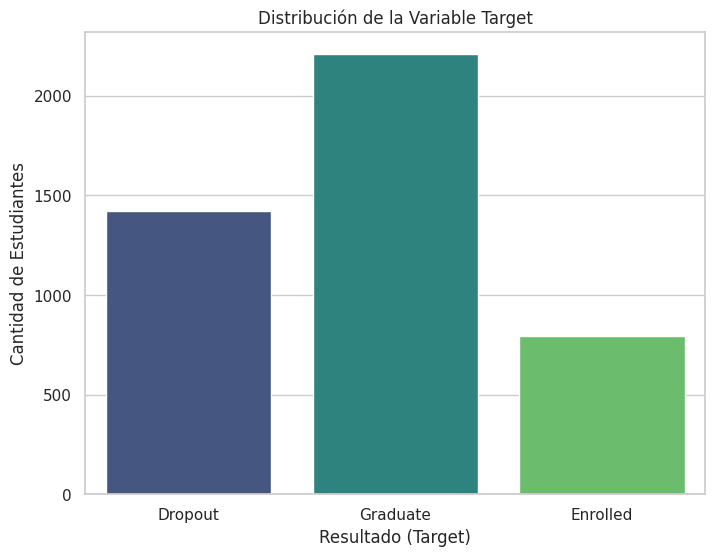

/tmp/ipykernel_42666/537187449.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y='Admission grade', palette='viridis')


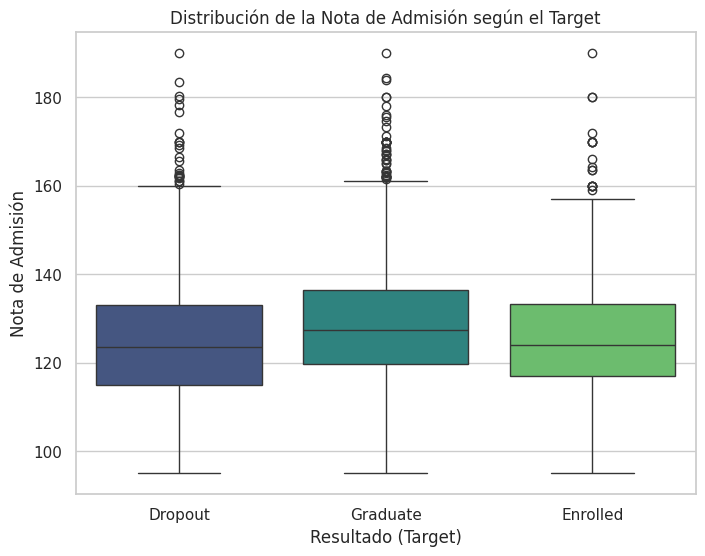

ValueError: could not convert string to float: 'Dropout'

<Figure size 1600x1200 with 0 Axes>

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# 1. Distribución de la variable 'Target'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target', palette='viridis')
plt.title('Distribución de la Variable Target')
plt.xlabel('Resultado (Target)')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

# 2. Análisis de la 'Admission grade' según el 'Target'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Target', y='Admission grade', palette='viridis')
plt.title('Distribución de la Nota de Admisión según el Target')
plt.xlabel('Resultado (Target)')
plt.ylabel('Nota de Admisión')
plt.show()

# 3. Correlación entre variables numéricas
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()
